<a href="https://colab.research.google.com/github/seharnazeer/Python--projects/blob/main/ID2_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from collections import Counter
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
class Node:
    def __init__(self, feature=None, value=None, results=None, true_branch=None, false_branch=None):
        self.feature = feature  # Feature to split on
        self.value = value      # Value of the feature to split on
        self.results = results  # Stores class labels if node is a leaf node
        self.true_branch = true_branch  # Branch for values that are True for the feature
        self.false_branch = false_branch  # Branch for values that are False for the feature


In [4]:
def entropy(data):
    counts = np.bincount(data)
    probabilities = counts / len(data)
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy


In [5]:
def split_data(X, y, feature, value):
    true_indices = np.where(X[:, feature] <= value)[0]
    false_indices = np.where(X[:, feature] > value)[0]
    true_X, true_y = X[true_indices], y[true_indices]
    false_X, false_y = X[false_indices], y[false_indices]
    return true_X, true_y, false_X, false_y


In [33]:
def build_tree(X, y, max_depth=None, current_depth=0):  # Add max_depth and current_depth parameters
    y = y.ravel()
    if len(set(y)) == 1 or (max_depth is not None and current_depth >= max_depth): # Check for max_depth condition
        return Node(results=y[0])

    best_gain = 0
    best_criteria = None
    best_sets = None
    n_features = X.shape[1]

    current_entropy = entropy(y)

    for feature in range(n_features):
        feature_values = set(X[:, feature])
        for value in feature_values:
            true_X, true_y, false_X, false_y = split_data(X, y, feature, value)
            true_entropy = entropy(true_y)
            false_entropy = entropy(false_y)
            p = len(true_y) / len(y)
            gain = current_entropy - p * true_entropy - (1 - p) * false_entropy

            if gain > best_gain:
                best_gain = gain
                best_criteria = (feature, value)
                best_sets = (true_X, true_y, false_X, false_y)

    if best_gain > 0:
        true_branch = build_tree(best_sets[0], best_sets[1], max_depth, current_depth + 1)  # Increment current_depth
        false_branch = build_tree(best_sets[2], best_sets[3], max_depth, current_depth + 1) # Increment current_depth
        return Node(feature=best_criteria[0], value=best_criteria[1], true_branch=true_branch, false_branch=false_branch)

    return Node(results=y[0])

In [34]:
def predict(tree, sample):
    if tree.results is not None:
        return tree.results
    else:
        branch = tree.false_branch
        if sample[tree.feature] <= tree.value:
            branch = tree.true_branch
        return predict(branch, sample)


In [35]:
X=pd.DataFrame(load_iris().data, columns=load_iris().feature_names).values
y=pd.DataFrame(load_iris().target, columns=["species"]).values.ravel()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
decision_tree=build_tree(X_train, y_train, max_depth=4)

In [41]:
decision_tree

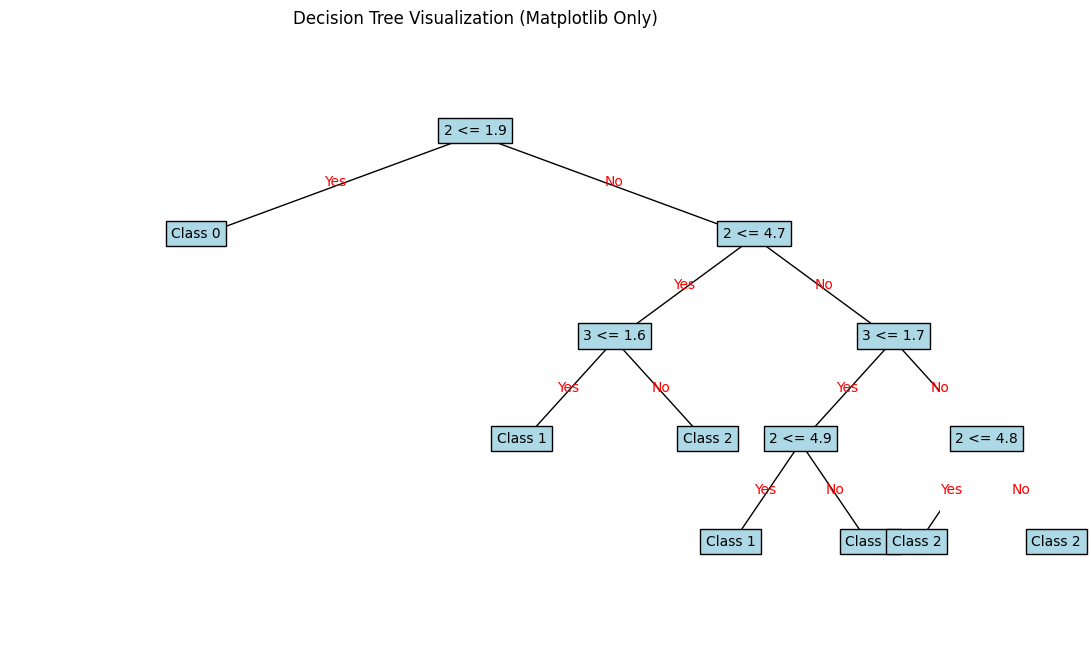

In [43]:
import matplotlib.pyplot as plt

def plot_tree(node, x=0, y=0, dx=6, dy=2, level=1, ax=None, parent=None, edge_label=""):
    """
    Recursively plots the decision tree using only Matplotlib.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.set_xlim(-10, 10)
        ax.set_ylim(-10, 2)
        ax.axis("off")  # Hide axis

    if node is None:
        return

    # Node label
    node_label = f"{node.feature} <= {node.value}" if node.feature else f"Class {node.results}"

    # Draw the current node
    ax.text(x, y, node_label, ha="center", bbox=dict(facecolor="lightblue", edgecolor="black"))

    if parent:
        ax.plot([parent[0], x], [parent[1], y], 'k-', lw=1)  # Draw edge
        ax.text((parent[0] + x) / 2, (parent[1] + y) / 2, edge_label, fontsize=10, ha="center", color="red")

    # Recursively add branches
    left_x, left_y = x - dx / level, y - dy
    right_x, right_y = x + dx / level, y - dy

    if node.true_branch:
        plot_tree(node.true_branch, left_x, left_y, dx, dy, level + 1, ax, (x, y), "Yes")

    if node.false_branch:
        plot_tree(node.false_branch, right_x, right_y, dx, dy, level + 1, ax, (x, y), "No")

def visualize_tree(root_node):
    """
    Generates and plots the decision tree using Matplotlib.
    """
    plot_tree(root_node)
    plt.title("Decision Tree Visualization (Matplotlib Only)")
    plt.show()

# Call the function with your root node
visualize_tree(decision_tree)


In [44]:
pred=predict(decision_tree, X_test[0])

In [45]:
pred

1

In [47]:
y_test[0]

1